<a href="https://colab.research.google.com/github/Shrez7961/Practice/blob/main/Day_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON**

## 1. A string is happy if every three consecutive characters are distinct. Write a Python program to find two indices making a given string unhappy.


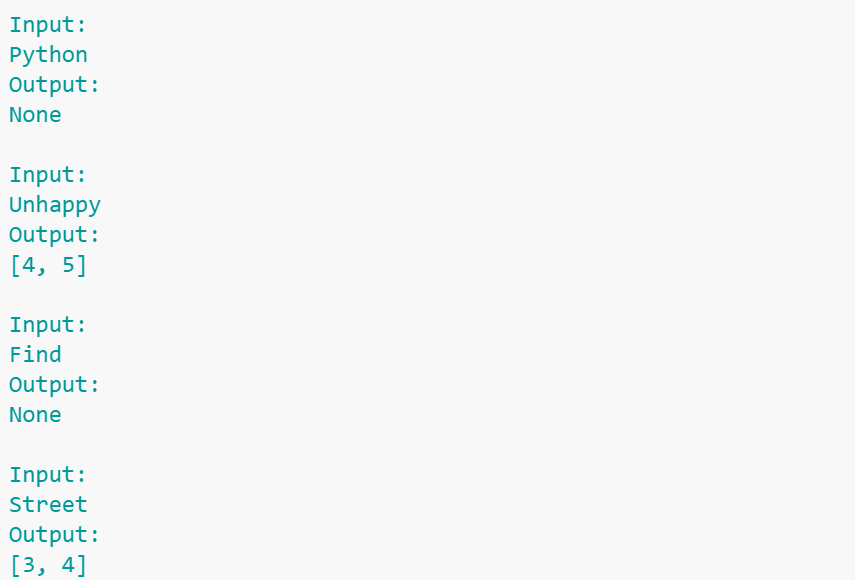

In [ ]:
# Write Your code here.
def find_index(string):
  unhappy_str = []
  for i in range(len(string)-1):
    if string[i] == string[i+1]:
      unhappy_str.append(i)
      unhappy_str.append(i+1)
      return unhappy_str

In [ ]:
a='python'
b='unhappy'
c='find'
d= 'street'
print(find_index(a))
print(find_index(b))
print(find_index(c))
print(find_index(d))

None
[4, 5]
None
[3, 4]


## 2. Write a Python program to find the index of the matching parentheses for each character in a given string.


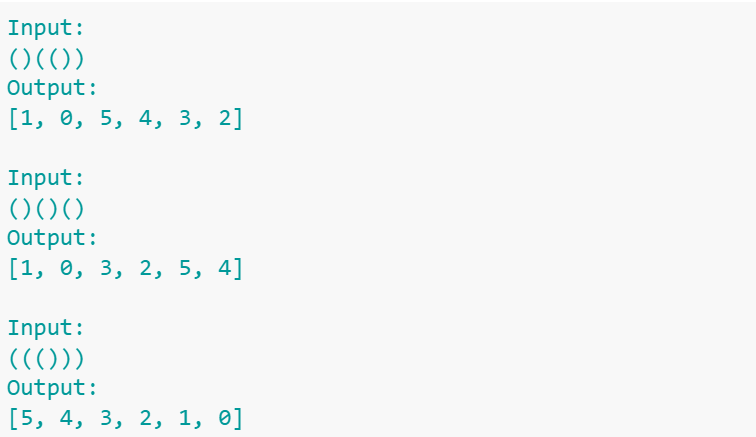

In [9]:
# Write Your code here.
def match(parenthesis):
    li = list(parenthesis)
    new_list = []
    for i, c in enumerate(li):
        if c == "(":
            new_list.append(i)
        else:
            li[new_list[-1]] = i
            li[i] = new_list.pop()
    return li 

In [10]:
p1 = "()(())"
p2 =  "()()()"
p3 = "((()))"
print(match(p1))
print(match(p2))
print(match(p3))


[1, 0, 5, 4, 3, 2]
[1, 0, 3, 2, 5, 4]
[5, 4, 3, 2, 1, 0]


# **SQL**



## 3. From the following dataframes, write a SQL query to display those managers who have average experience for each scheme.

**Create dataframe 1:managing_body**

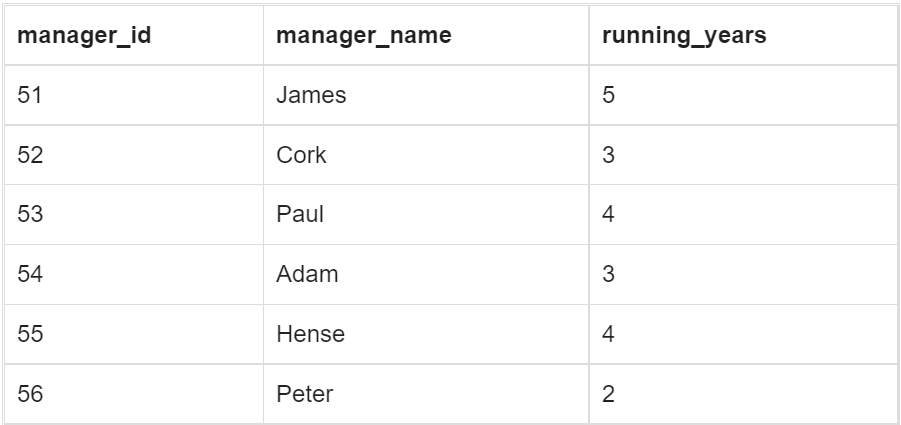

**Create dataframe 2:scheme**


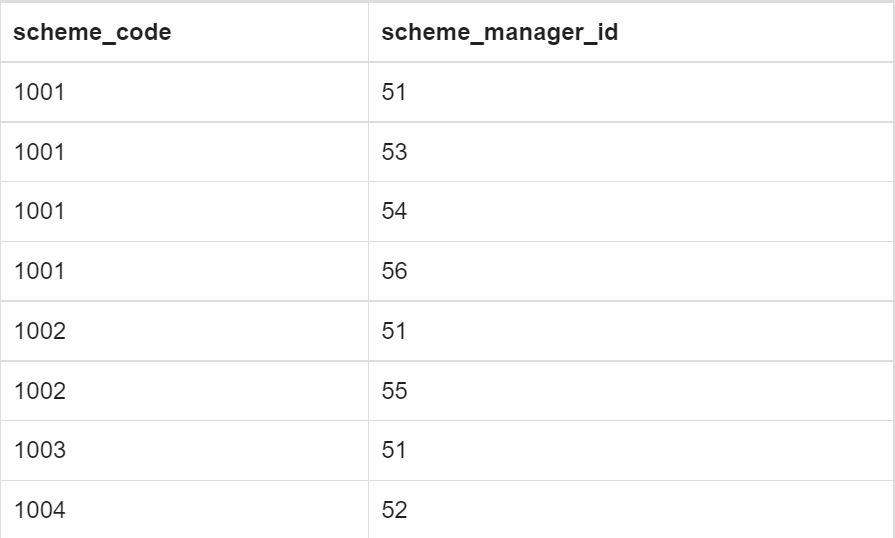








**Expected Output:**

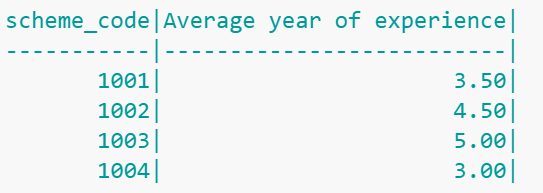

In [12]:
# Install SQlite & Pandasql
!pip install db-sqlite3
!pip install pandasql

# Importing Libraries
import pandas as pd
import sqlite3
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals())


# Connection to DataBase
conn = sqlite3.connect('test7_database') 
c = conn.cursor()

# Create table
c.execute('''DROP TABLE IF EXISTS managing_body;''')

c.execute('''CREATE TABLE managing_body (
[manager_id] INTEGER,
[manager_name] VARCHAR,
[running_years]  INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO managing_body VALUES(51,'James',5);''')
c.execute('''INSERT INTO managing_body VALUES(52,'Cork',3);''')
c.execute('''INSERT INTO managing_body VALUES(53,'Paul',4);''')
c.execute('''INSERT INTO managing_body VALUES(54,'Adam',3);''')
c.execute('''INSERT INTO managing_body VALUES(55,'Hense',4);''')
c.execute('''INSERT INTO managing_body VALUES(56,'Peter',2);''')


# Create table
c.execute('''DROP TABLE IF EXISTS scheme;''')

c.execute('''CREATE TABLE scheme (
[scheme_code] INTEGER,
[scheme_manager_id]  INTEGER);''')


          
# Insert data into table          
c.execute('''INSERT INTO scheme VALUES(1001,	51);''')
c.execute('''INSERT INTO scheme VALUES(1001,	53);''')
c.execute('''INSERT INTO scheme VALUES(1001,	54);''')
c.execute('''INSERT INTO scheme VALUES(1001,	56);''')
c.execute('''INSERT INTO scheme VALUES(1002,	51);''')
c.execute('''INSERT INTO scheme VALUES(1002,	55);''')
c.execute('''INSERT INTO scheme VALUES(1003,	51);''')
c.execute('''INSERT INTO scheme VALUES(1004,	52);''')



conn.commit()

# Get DataFrame
conn = sqlite3.connect('test7_database') 
managing_body = pd.read_sql_query ('''SELECT * FROM managing_body''',conn)
scheme = pd.read_sql_query ('''SELECT * FROM scheme''',conn)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 5.1 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=a4999acae19a178b620bea3abb99190fd18e813364c828eff00d54eef3143629
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=0bdb03f22be5640eaa04c899febcb0a8f21dc31ade840ffb97b7665bfd2402fb
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=6226f17205e70cb115bc8e6b9fcdc899114ae543bc3710d6a31764ad2f08f241
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm
Looking in indexes: https://pypi

In [20]:
# Write Your code here.
mysql('''
SELECT sc.scheme_code  , 
ROUND(SUM(mb.running_years)/NULLIF(COUNT(DISTINCT mb.manager_id), 0) ,2) AS 'Average years of experience'
FROM scheme as sc JOIN managing_body as mb 
ON mb.manager_id  = sc.scheme_manager_id
GROUP BY sc.scheme_code
''')

,scheme_code,Average years of experience
0,1001,3.0
1,1002,4.0
2,1003,5.0
3,1004,3.0


## 4. From the above dataframes, write a SQL query to find those schemes which executed by minimum number of employees. Return scheme code.

**Expected Output:**

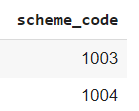

In [47]:
# Write Your code here.
print(mysql('''
SELECT * from scheme
'''))


   scheme_code  scheme_manager_id
0         1001                 51
1         1001                 53
2         1001                 54
3         1001                 56
4         1002                 51
5         1002                 55
6         1003                 51
7         1004                 52


In [56]:
mysql('''select
count(scheme_code) from scheme
''')

,count(scheme_code)
0,8


In [54]:
mysql('''
SELECT MIN(No_Of_Emp) FROM 
(SELECT COUNT(*) AS No_Of_Emp)
''')

,MIN(No_Of_Emp)
0,1


In [65]:
mysql('''
select scheme_code 
from scheme
group by scheme_code
having count(scheme_code) = (SELECT MIN(No_Of_Emp) FROM (SELECT COUNT(*) AS No_Of_Emp 
from scheme
group by scheme_code))
''')

,scheme_code
0,1003
1,1004


#**MATH**

## 5. It has been determined that 5% of drivers checked at a road stop show traces of alcohol and 10% of drivers checked do not wear seat belts. In addition, it has been observed that the two infractions are independent from one another. If an officer stops five drivers at random:

## -- Calculate the probability that exactly three of the drivers have committed any one of the two offenses.

## -- Calculate the probability that at least one of the drivers checked has committed at least one of the two offenses.

**Solve this on a piece of paper and submit the image.**

Upload Your answer here.

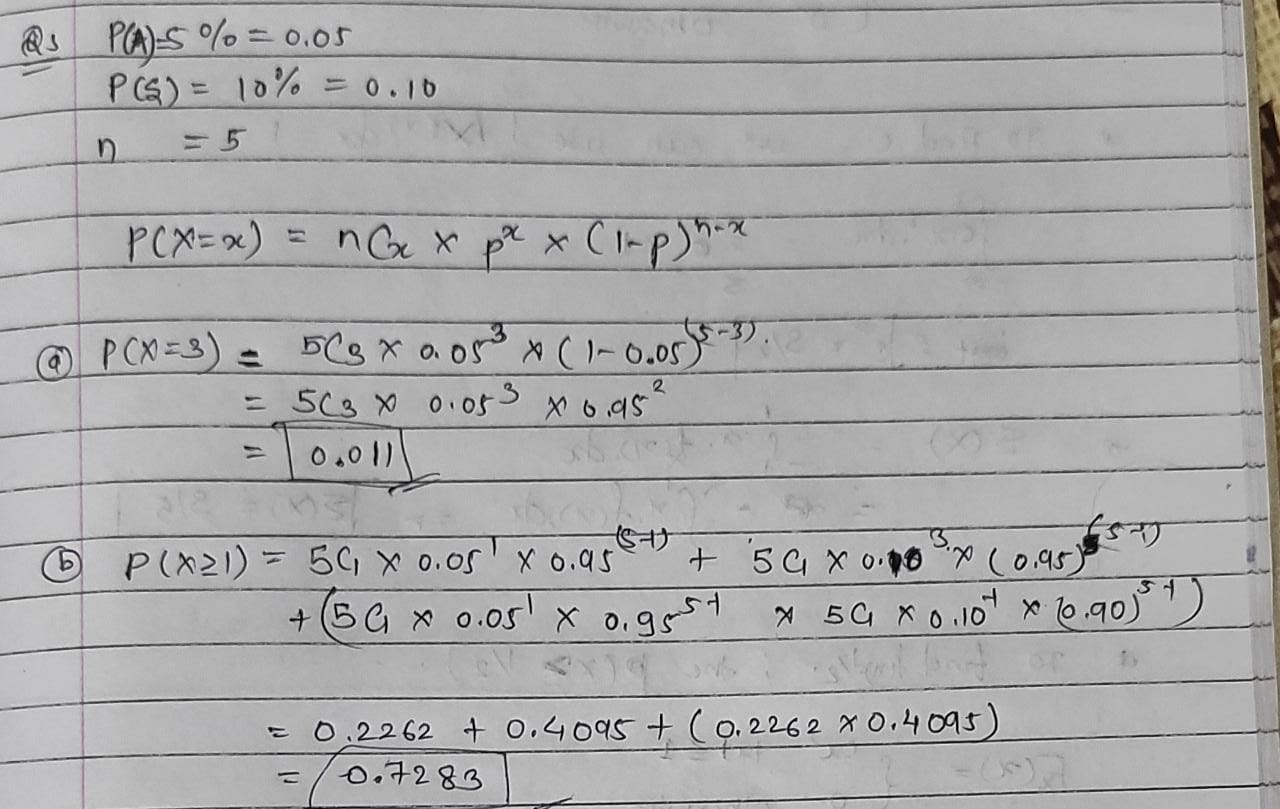

## 6. As only 3 students came to attend the class today, find the probability for exactly 4 students to attend the classes tomorrow.

**Solve this on a piece of paper and submit the image.**

Upload Your answer here.

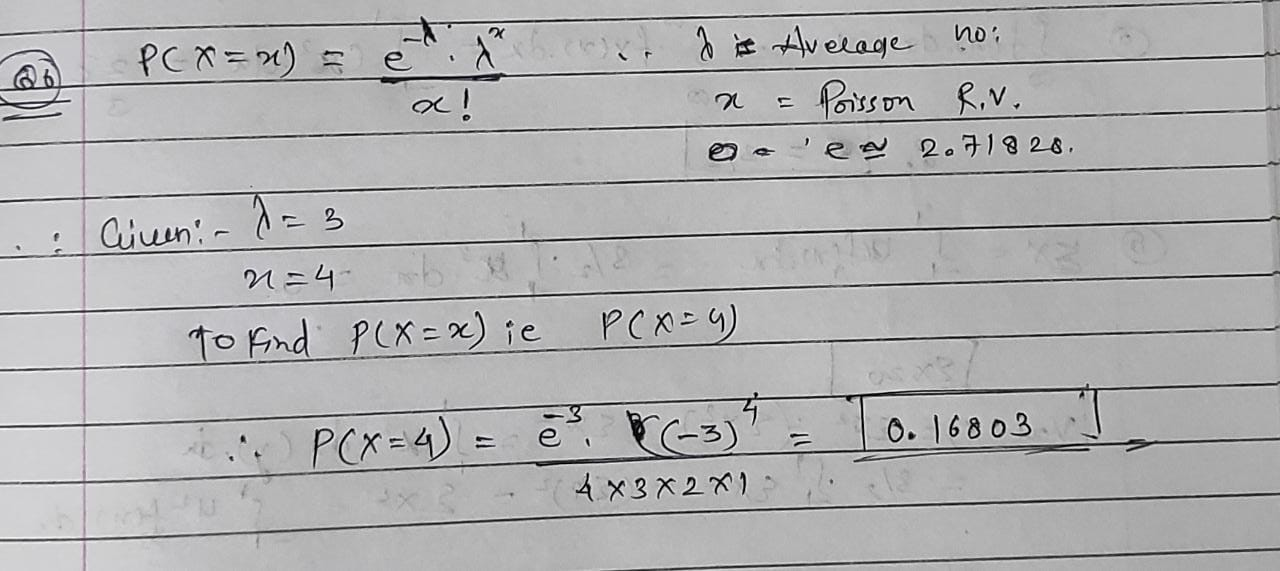

# **MACHINE LEARNING**


## 7. Why is Logistic Regression termed as Regression and not classification?

Write Your answer here.

Logisctic regression is termed as Regression as it follows the ideology of regression method to solve the algorithm and predict the output.
It actually splits the required output into two or more than two categories and calculate the probabilities of each and then categorize each of them based on regression model method.

## 8. Why can’t we use Mean Square Error (MSE) as a cost function for Logistic Regression?

Write Your answer here.

In logistic regression, we use the sigmoid function to obtain the probabilities of the dependent variable. Squaring this non-linear transformation will lead to non-convexity with local minimums. Finding the global minimum in such cases using gradient descent is not possible. Due to this reason, MSE is not suitable for logistic regression.